<a href="https://colab.research.google.com/github/vinicius-mattoso/Projeto_Final_DataMining/blob/main/BASELINE_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montar o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# para fazer esse comando funcionar, precisar clicar com o botão direito e fazer
# "add a shourtcut to drive"
%cd /content/drive/My Drive/GRUPO - 02 - BI Master/Projeto DM

/content/drive/My Drive/GRUPO - 02 - BI Master/Projeto DM


In [ ]:
!ls

 Analise_Exploratoria.ipynb
 BASE_LINE.ipynb
 Base_Rj_2019_1_FILTER1.csv
 Base_Rj_2019_1_FULL.csv
 Base_Rj_2019_1_FULL_V0.csv
'Cópia de Projeto_Python_SIH_DG.ipynb'
'Eduardo_Colunas 1 a 30.ipynb'
 Enconde_data_V1.ipynb
 ENSP_Dissertação_Santos_Andréia_Cristina.pdf
'Fontes úteis.gdoc'
 IT_SIHSUS_1603.pdf
 rj_sih_sus_01_2015.csv
 tree.png
 Untitled0.ipynb
 ViniciciusM_feature_clean_SIH_DG.ipynb


In [ ]:
import pandas as pd
df2=pd.read_csv('Base_Rj_2019_1_FILTER1.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62412 entries, 0 to 62411
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    62412 non-null  int64  
 1   Unnamed: 0.1  62412 non-null  int64  
 2   SEXO          62412 non-null  int64  
 3   UTI_MES_TO    62412 non-null  int64  
 4   MARCA_UTI     62412 non-null  int64  
 5   US_TOT        62412 non-null  float64
 6   DIAG_PRINC    62412 non-null  object 
 7   IDADE         62412 non-null  int64  
 8   DIAS_PERM     62412 non-null  int64  
 9   MORTE         62412 non-null  int64  
 10  CAR_INT       62412 non-null  int64  
 11  NUM_FILHOS    62412 non-null  int64  
 12  CONTRACEP1    62412 non-null  int64  
 13  CONTRACEP2    62412 non-null  int64  
 14  COMPLEX       62412 non-null  int64  
 15  RACA_COR      62412 non-null  int64  
 16  VAL_SH_FED    62412 non-null  float64
 17  VAL_SP_FED    62412 non-null  float64
 18  VAL_SH_GES    62412 non-nu

In [ ]:
df2=df2.drop(columns=['Unnamed: 0','Unnamed: 0.1','VAL_SH_GES','VAL_SP_GES'])

# Convertendo para int as variaveis do tipo object
df2['TPDISEC7']=df2['TPDISEC7'].astype(str).astype(int)
df2['TPDISEC6']=df2['TPDISEC6'].astype(str).astype(int)
df2['TPDISEC5']=df2['TPDISEC5'].astype(str).astype(int)
df2['TPDISEC4']=df2['TPDISEC4'].astype(str).astype(int)
df2['TPDISEC3']=df2['TPDISEC3'].astype(str).astype(int)
df2['TPDISEC2']=df2['TPDISEC2'].astype(str).astype(int)
df2['TPDISEC1']=df2['TPDISEC1'].astype(str).astype(int)
from sklearn import preprocessing

LABEL_ENCODING_DIAG1 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG2 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG3 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG4 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG5 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG6 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG7 = preprocessing.LabelEncoder()

df2['DIAGSEC1']=LABEL_ENCODING_DIAG1.fit_transform(df2['DIAGSEC1'])
df2['DIAGSEC2']=LABEL_ENCODING_DIAG2.fit_transform(df2['DIAGSEC2'])
df2['DIAGSEC3']=LABEL_ENCODING_DIAG3.fit_transform(df2['DIAGSEC3'])
df2['DIAGSEC4']=LABEL_ENCODING_DIAG4.fit_transform(df2['DIAGSEC4'])
df2['DIAGSEC5']=LABEL_ENCODING_DIAG5.fit_transform(df2['DIAGSEC5'])
df2['DIAGSEC6']=LABEL_ENCODING_DIAG6.fit_transform(df2['DIAGSEC6'])
df2['DIAGSEC7']=LABEL_ENCODING_DIAG7.fit_transform(df2['DIAGSEC7'])

LABEL_ENCODING_DIAG_PRINC = preprocessing.LabelEncoder()
df2['DIAG_PRINC']=LABEL_ENCODING_DIAG_PRINC.fit_transform(df2['DIAG_PRINC'])

In [ ]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = df2.loc[:,df2.columns != 'MORTE']  # Entrada
y = df2.MORTE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)

In [ ]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed):
  model = DecisionTreeClassifier(random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

seed=200
model = train(X_train, y_train, seed)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

# Visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plt.subplots(figsize=(80, 40)) # Definir tamanho da imagem a ser gerada
plot_tree(model, class_names=['VIVEU', 'MORREU'], feature_names=df2.columns,
               filled=True, rounded=True); # plota a árvore

plt.savefig('tree.png') # Salva a imagem

In [ ]:
# profundidade da árvore
model.get_depth()

39

Resultados de Treino
Acurácia:  0.9999399146788439
Kappa:  0.9995271655970807
F1:  0.9995594066676458


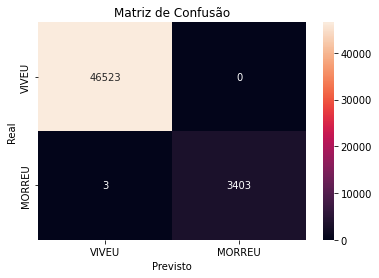

Resultados de Teste
Acurácia:  0.9157253865256749
Kappa:  0.3388437924012013
F1:  0.3840749414519906


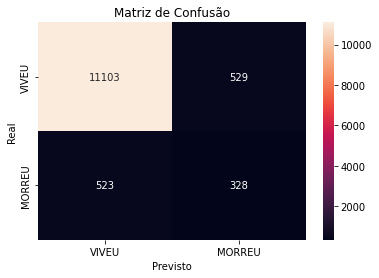

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')


    # Colocar os nomes
  ax.xaxis.set_ticklabels(['VIVEU', 'MORREU']) 
  ax.yaxis.set_ticklabels(['VIVEU', 'MORREU'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [ ]:
len(X_test)

12483

In [ ]:
resultado_errado=467+549

In [ ]:
error_percentual=(resultado_errado/len(X_test))*100

In [ ]:
error_percentual

8.13906913402227

## Tec. de OverSampling


In [ ]:
!sudo pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
# ESSE CASO IGUALA TODOS OS CASOS SUBINDO A MENOR CLASSE ATE A MARIO
# define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [ ]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
y_over.sum()

29077

In [ ]:
MORTOS_NOVOS=y_over.sum()
VIVOS_NOVOS=len(y_over)-MORTOS_NOVOS

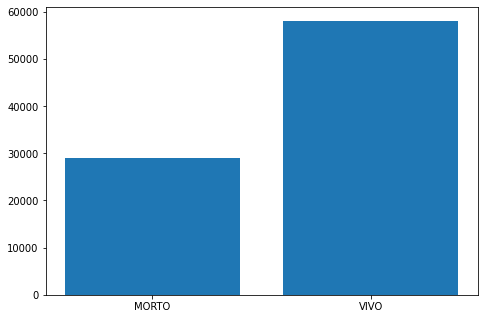

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['MORTO', 'VIVO']
students = [MORTOS_NOVOS,VIVOS_NOVOS]
ax.bar(langs,students)
plt.show()

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_over, 
                                                    y_over, 
                                                    test_size=0.2, 
                                                    stratify=y_over)

In [ ]:
def train_2(X_train, y_train, seed):
  model_2 = DecisionTreeClassifier(random_state=seed) # tente mudar parâmetro para evitar overfitting
  model_2.fit(X_train_2, y_train_2);
  return model

seed=200
model_2 = train(X_train_2, y_train_2, seed)

In [ ]:
# profundidade da árvore
model_2.get_depth()

38

Resultados de Treino
Acurácia:  0.9569391703088056
Kappa:  0.9008078514778018
F1:  0.9322603187484502


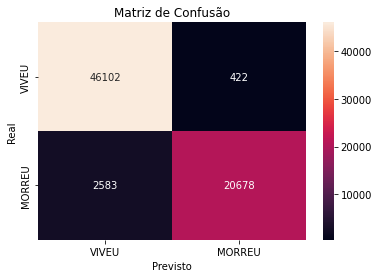

Resultados de Teste
Acurácia:  0.955637072276036
Kappa:  0.897904415151324
F1:  0.9303455723542117


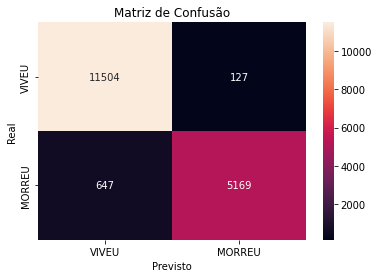

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')


    # Colocar os nomes
  ax.xaxis.set_ticklabels(['VIVEU', 'MORREU']) 
  ax.yaxis.set_ticklabels(['VIVEU', 'MORREU'])
  plt.show()

# CHAMANDO A FUNCAO CRIADA EM CIMA

print('Resultados de Treino')
predict_and_evaluate(model_2, X_train_2, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_2, X_test_2, y_test_2)

In [ ]:
len(X_test_2)

17447

In [ ]:
resultado_errado=647+127

In [ ]:
error_percentual=(resultado_errado/len(X_test))*100
error_percentual

4.4362927723964

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# model_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# define model
model_XGB = XGBClassifier()

In [ ]:
model_XGB2 = XGBClassifier()
model_XGB2.fit(X_train, y_train)
print(); print(model_XGB2)


XGBClassifier()


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
X_sel = X_train
sel_test =X_test
xgtrain = xgb.DMatrix(X_sel, label=y_train)
clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 7,
                n_estimators=100,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                seed=1301)
xgb_param = clf.get_xgb_params()
#do cross validation
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=500, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(X_sel, y_train, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_sel)[:,1]))
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(sel_test, ntree_limit=cvresult.shape[0])

# submission = pd.DataFrame({"ID":test.index, "TARGET":pred[:,1]})
# submission.to_csv("submission.csv", index=False)

Start cross validation
Best number of trees = 275
Fit on the trainingsdata
Overall AUC: 0.9730942690707072
Predict the probabilities based on features in the test set


In [ ]:
from sklearn import metrics
expected_y  = y_test
predicted_y = clf.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11632
           1       0.77      0.38      0.51       851

    accuracy                           0.95     12483
   macro avg       0.86      0.69      0.74     12483
weighted avg       0.94      0.95      0.94     12483

[[11534    98]
 [  527   324]]


In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
print(model_XGB)

XGBClassifier()


In [ ]:
scores.max()

0.944279633771493

In [ ]:
# fit xgboost on an imbalanced classification dataset
from numpy import mean
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.91955


In [ ]:
model_XGB.fit(X_train, y_train)

XGBClassifier()

Resultados de Treino
Acurácia:  0.9623064751947766
Kappa:  0.6274711189192911
F1:  0.6457078313253013


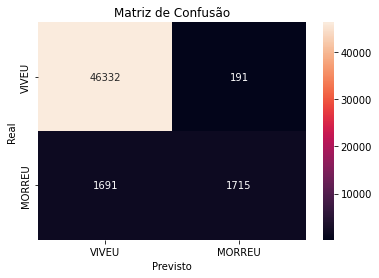

Resultados de Teste
Acurácia:  0.9499319073940559
Kappa:  0.48579233045852677
F1:  0.5090337784760408


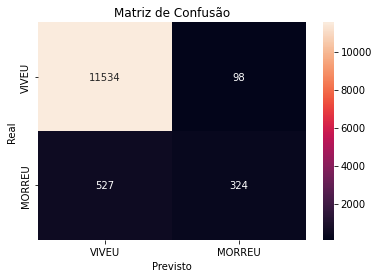

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')


    # Colocar os nomes
  ax.xaxis.set_ticklabels(['VIVEU', 'MORREU']) 
  ax.yaxis.set_ticklabels(['VIVEU', 'MORREU'])
  plt.show()

# CHAMANDO A FUNCAO CRIADA EM CIMA

print('Resultados de Treino')
predict_and_evaluate(clf, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(clf, X_test, y_test)

In [ ]:
#  https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance/notebook